# Explanatory Data Analysis / Data Preprocessing

## Penggunaan pandas untuk melakukan EDA

Pertama sekali dimulai dengan mengimpor data dari berkas CSV menggunakan pustaka pandas dan melihat waktu eksekusinya.

In [1]:
import pandas as pd
%time data = pd.read_csv("./train.csv", delimiter=',', index_col=0)

Wall time: 285 ms


Menampilkan beberapa sampel data dengan perintah berikut.

In [2]:
data.sample(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
patient_id,,,,,,,
5595,Actifed,Cold Symptoms,"""When used for colds, Actifed works well for d...",8,20-Oct-09,7,5.305232
198569,Regimex,6</span> users found this comment helpful.,"""Regimex did curve my appetite but it also mad...",7,6-Oct-13,6,2.406417
64861,Sertraline,Panic Disorde,"""I used to take Zoloft for many years (approx ...",4,29-Apr-15,18,6.357725
216744,Rosuvastatin,High Cholesterol,"""Currently on Crestor 20mg but I cut it in hal...",5,17-Aug-16,39,5.413709
177810,Duloxetine,Back Pain,"""I started taking Cymbalta for chronic low bac...",10,18-Mar-13,42,8.054771


Menampilkan statistik deskriptif dengan perintah berikut.

In [3]:
data.describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


Dari hasil tersebut dapat disimpulkan bahwa tidak ditemukan noise pada effectiveness_rating dan base_score 

Kemudian memeriksa nilai yang hilang. Kami hanya akan mencetak 10 fitur secara berurut dengan lebih dari 10% nilai yang hilang.

In [4]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent']>10][:10]

,Total,Missing Percent


Ditemukan bahwa pada dataset yang kami gunakan tidak terdapat missing value.

Selanjutnya digunakan pandas-profiling untuk dapat menampilkan informasi secara dinamis dan mudah.
Pandas-profiling menyatukan semua elemen-elemen yang tersedia untuk membentuk EDA yang lengkap: nilai yang paling sering muncul, nilai yang hilang, korelasi, statistik kuantitatif dan deskriptif, panjang data dan banyak lagi. Berkat metrik ini, Anda akan dengan cepat melihat distribusi dan disparitas data Anda. Informasi ini penting untuk mengetahui apakah data dapat diolah di proses yang selanjutnya atau tidak.

In [5]:
import pandas_profiling

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="drugs_pandas_profiling.html")

Berkas drugs_pandas_profiling.html menyajikan bagian “ikhtisar” dari laporan. Bagian ini secara
singkat menyajikan informasi tentang jenis variabel, nilai yang hilang, atau ukuran data set.

Selanjutnya akan dilakukan pengecekan data yang duplicated

In [6]:
duplicated_data = data[data.duplicated()]
print("Jumlah duplicated data :",len(duplicated_data))

Jumlah duplicated data : 0


Selanjutnya data yang memiliki rating dibawah 5 dibuang

In [7]:
data_reduction = data[data.effectiveness_rating >= 5]
display(data_reduction)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
patient_id,,,,,,,
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792
...,...,...,...,...,...,...,...
90582,Docosanol,Herpes Simplex,"""It really works!! Ive got cold sores twice be...",10,17-May-15,22,8.757201
183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076


# Penggunaan Seaborn untuk melakukan EDA

Menyertakan beberapa pustaka pendukung seperti numpy dan matplotlib terlebih dahulu.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

impor pustaka seaborn

In [9]:
import seaborn as sns

Untuk melakukan EDA, mari menggunakan data set yang digunakan

In [10]:
data_reduction.shape

(24169, 7)

In [11]:
data_reduction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24169 entries, 206461 to 45410
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name_of_drug                24169 non-null  object 
 1   use_case_for_drug           24169 non-null  object 
 2   review_by_patient           24169 non-null  object 
 3   effectiveness_rating        24169 non-null  int64  
 4   drug_approved_by_UIC        24169 non-null  object 
 5   number_of_times_prescribed  24169 non-null  int64  
 6   base_score                  24169 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


Menganalisis Variabel Secara Individual

In [12]:
numerical_vars = ['effectiveness_rating', 'drug_approved_by_UIC', 'number_of_times_prescribed', 'base_score']
categorical_vars = ['name_of_drug', 'use_case_for_drug', 'review_by_patient']

In [13]:
drugs = data_reduction[numerical_vars+categorical_vars]

In [14]:
drugs.shape

(24169, 7)

Memahami Variabel Utama

In [15]:
drugs['use_case_for_drug'].describe()

count             24169
unique              599
top       Birth Control
freq               3746
Name: use_case_for_drug, dtype: object

Variabel Numerikal

In [16]:
drugs[numerical_vars].describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,24169.000000,24169.000000,24169.000000
mean,8.694278,31.979974,6.829511
std,1.522261,38.851090,1.541507
min,5.000000,0.000000,0.899076
25%,8.000000,8.000000,6.173134
50%,9.000000,20.000000,6.952928
75%,10.000000,42.000000,8.022969
max,10.000000,771.000000,8.853339


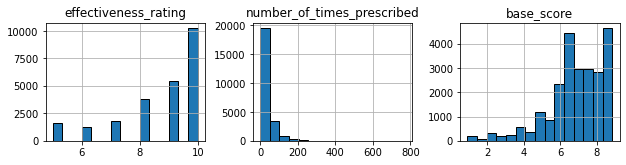

In [17]:
drugs[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

Variabel Kategorikal

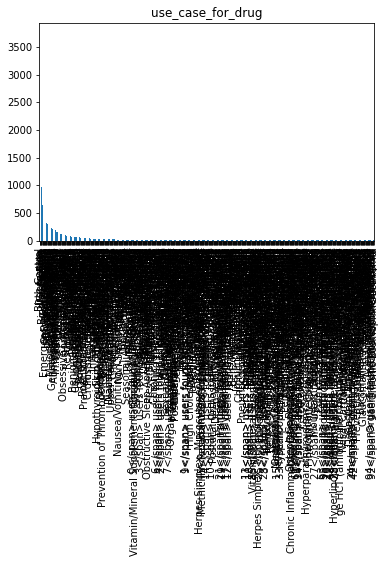

In [18]:
drugs['use_case_for_drug'].value_counts().plot(kind='bar', title='use_case_for_drug');

In [19]:
drugs_names = drugs.name_of_drug.unique().tolist()
print("Jumlah Nama obat keseluruhan : ",len(drugs_names))
drugs_cases = drugs.use_case_for_drug.unique().tolist()
print("Jumlah case keseluruhan : ",len(drugs_cases))



Jumlah Nama obat keseluruhan :  2049
Jumlah case keseluruhan :  599


In [20]:
drugs_cases

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Depression',
 'ibromyalgia',
 'Bipolar Disorde',
 'HIV Infection',
 'Rheumatoid Arthritis',
 'Psychosis',
 'Vaginal Yeast Infection',
 'Panic Disorde',
 'Muscle Spasm',
 'Hepatitis C',
 'Pain',
 'Bowel Preparation',
 'emale Infertility',
 'Constipation, Drug Induced',
 'Skin and Structure Infection',
 'Acne',
 'High Blood Pressure',
 'Anxiety',
 'Obesity',
 'Endometriosis',
 'Keratoconjunctivitis Sicca',
 'Diabetes, Type 2',
 'Chronic Pain',
 'Migraine',
 'Weight Loss',
 'Trichotillomania',
 'Restless Legs Syndrome',
 "Barrett's Esophagus",
 'Bronchitis',
 'Diverticulitis',
 'Influenza',
 'Anxiety and Stress',
 'Abnormal Uterine Bleeding',
 'Benign Prostatic Hyperplasia',
 'Hypogonadism, Male',
 'Osteoarthritis',
 'Insomnia',
 'Autism',
 'Smoking Cessation',
 'Psoriatic Arthritis',
 'Irritable Bowel Syndrome',
 'Emergency Contraception',
 'Nausea/Vomiting',
 'Urinary Tract Infection',
 'Constipation',
 

data case pada drugs memiliki noise yaitu beberapa data berisikan "users found this comment helpful", data yang mengandung noise akan di bersihkan

In [21]:
drugs[drugs.use_case_for_drug.str.contains("comment")]

,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,name_of_drug,use_case_for_drug,review_by_patient
patient_id,,,,,,,
157314,10,15-Jan-12,8,7.737593,Latisse,8</span> users found this comment helpful.,"""Lashes are much longer and fuller. No side ef..."
182965,8,3-Nov-15,4,7.493870,Cymbalta,4</span> users found this comment helpful.,"""I suffer from PTSD and the associated issues ..."
80623,8,18-May-08,94,4.884212,Mobic,94</span> users found this comment helpful.,"""I have been having severe hip pain for over 9..."
220829,9,29-Jun-10,4,8.457255,Loestrin 24 Fe,4</span> users found this comment helpful.,"""I am almost done with my first pack of these ..."
171578,10,11-Jul-12,75,6.234083,Wellbutrin,75</span> users found this comment helpful.,"""25 year old female. I Love IT. I take 150 SR ..."
...,...,...,...,...,...,...,...
133182,10,17-Oct-12,2,8.074493,Tri-Sprintec,2</span> users found this comment helpful.,"""I have been on Trisprintec for three years. I..."
10015,8,24-Jan-13,25,4.839710,Lo Loestrin Fe,25</span> users found this comment helpful.,"""I am 45 and I kept getting anxiety meds, but ..."
6477,7,21-Oct-12,1,3.766355,Ocella,1</span> users found this comment helpful.,"""I have been taking Ocella for about 3 years n..."


In [22]:
drugs = drugs[drugs.use_case_for_drug.str.contains("comment")==False]

In [23]:
drugs_names = drugs.name_of_drug.unique().tolist()
print("Jumlah Nama obat keseluruhan : ",len(drugs_names))
drugs_cases = drugs.use_case_for_drug.unique().tolist()
print("Jumlah case keseluruhan : ",len(drugs_cases))

Jumlah Nama obat keseluruhan :  2043
Jumlah case keseluruhan :  560


## KNN Modelling by user rating

In [24]:
drugs.reset_index(level=drugs.index.names, inplace=True)

In [25]:
drugs_rating = (drugs.
     groupby(by = ['name_of_drug'])['effectiveness_rating'].
     count().
     reset_index().
     rename(columns = {'effectiveness_rating': 'total_rating_count'})
     [['name_of_drug', 'total_rating_count']]
    )

In [26]:
drugs_rating.head()

,name_of_drug,total_rating_count
0,Abacavir / dolutegravir / lamivudine,7
1,Abatacept,1
2,Abilify,52
3,Abilify Discmelt,1
4,Abiraterone,1


In [27]:
drugs_rating

,name_of_drug,total_rating_count
0,Abacavir / dolutegravir / lamivudine,7
1,Abatacept,1
2,Abilify,52
3,Abilify Discmelt,1
4,Abiraterone,1
...,...,...
2038,Zyprexa,20
2039,Zyprexa Intramuscular,1
2040,Zyrtec,11
2041,Zyvox,6


In [28]:
from scipy.sparse import csr_matrix
import numpy as np


In [29]:

combined_data = drugs_rating.merge(drugs, left_on='name_of_drug',right_on = 'name_of_drug', how= 'left')
combined_data.drop(['drug_approved_by_UIC', 'number_of_times_prescribed', 'base_score','review_by_patient'], axis=1)

#combined data filtered by condition given
combined_data = combined_data[combined_data.use_case_for_drug=='Autism']

#combined data choose one with most high rated
filtered_drug_rating = (combined_data.
     groupby(by = ['name_of_drug'])['effectiveness_rating'].
     mean().
     reset_index().
     rename(columns = {'effectiveness_rating': 'average_rating'})
     [['name_of_drug', 'average_rating']]
    )
filtered_drug_rating = filtered_drug_rating.sort_values(by='average_rating', ascending=False)

pivot_data = combined_data.pivot(index='name_of_drug',columns='patient_id',values='effectiveness_rating').fillna(0)
matrix = csr_matrix(pivot_data.values)


Berikut merupakan 5 obat dengan rating tertinggi untuk use case yang di filter

In [30]:
filtered_drug_rating.head(5)

,name_of_drug,average_rating
2,Geodon,10.0
3,Paliperidone,10.0
6,Venlafaxine,10.0
0,Abilify,8.5
1,Aripiprazole,8.5


In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [33]:
for i in range(len(pivot_data)):
    if pivot_data.iloc[i].name == filtered_drug_rating.iloc[0].name_of_drug:
        query_index = i
        break
        
distances, indices = model_knn.kneighbors(pivot_data.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommended drug is {0}'.format(pivot_data.index[query_index]))
        print('Similar drugs :\n')
    else:
        print('{0}. {1},  distance:{2}'.format(i, pivot_data.index[indices.flatten()[i]], distances.flatten()[i]))

Recommended drug is Geodon
Similar drugs :

1. Risperidone,  distance:1.0
2. Paliperidone,  distance:1.0
3. Venlafaxine,  distance:1.0
4. Abilify,  distance:1.0


## KNN Modelling by use case 

In [34]:
combined_data = drugs_rating.merge(drugs, left_on='name_of_drug',right_on = 'name_of_drug', how= 'left')

In [35]:
drug_rating = (combined_data.
     groupby(by = ['name_of_drug','use_case_for_drug'])['effectiveness_rating'].
     mean().
     reset_index().
     rename(columns = {'effectiveness_rating': 'average_rating'})
     [['name_of_drug','use_case_for_drug', 'average_rating']]
    )

In [36]:
pivot_data = drug_rating.pivot(index='name_of_drug',columns='use_case_for_drug',values='average_rating').fillna(0)
matrix = csr_matrix(pivot_data.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(matrix)




NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
#combined data filtered by condition given
combined_data_filtered = combined_data[combined_data.use_case_for_drug=='Autism']

#combined data choose one with most high rated
filtered_drug_rating = (combined_data_filtered.
     groupby(by = ['name_of_drug'])['effectiveness_rating'].
     mean().
     reset_index().
     rename(columns = {'effectiveness_rating': 'average_rating'})
     [['name_of_drug', 'average_rating']]
    )
filtered_drug_rating = filtered_drug_rating.sort_values(by='average_rating', ascending=False)


In [38]:
filtered_drug_rating

,name_of_drug,average_rating
2,Geodon,10.0
3,Paliperidone,10.0
6,Venlafaxine,10.0
0,Abilify,8.5
1,Aripiprazole,8.5
5,Risperidone,7.5
7,Ziprasidone,7.0
4,Risperdal,6.5


In [39]:
#get index
for i in range(len(pivot_data)):
    if pivot_data.iloc[i].name == filtered_drug_rating.iloc[0].name_of_drug:
        query_index = i
        break

distances, indices = model_knn.kneighbors(pivot_data.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommended drug is {0}'.format(pivot_data.index[query_index]))
        print('Similar drugs :\n')
    else:
        print('{0}. {1},  distance:{2}'.format(i, pivot_data.index[indices.flatten()[i]], distances.flatten()[i]))

Recommended drug is Geodon
Similar drugs :

1. Ziprasidone,  distance:0.13503971129809889
2. Paliperidone,  distance:0.15446915993916932
3. Abilify,  distance:0.21597767095967058
4. Invega,  distance:0.2871913267986823
5. Latuda,  distance:0.28782640028508466
6. Lurasidone,  distance:0.3624069808577135
7. Saphris,  distance:0.3655480200582055
8. Aripiprazole,  distance:0.3944000321271519
9. Asenapine,  distance:0.3987872408950962
